In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('zomato_data.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [141]:
#Data Cleaning
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = df['rate'].astype('float')

In [142]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


### Q1. What type of restaurant do the majority of the customers order from?

In [143]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

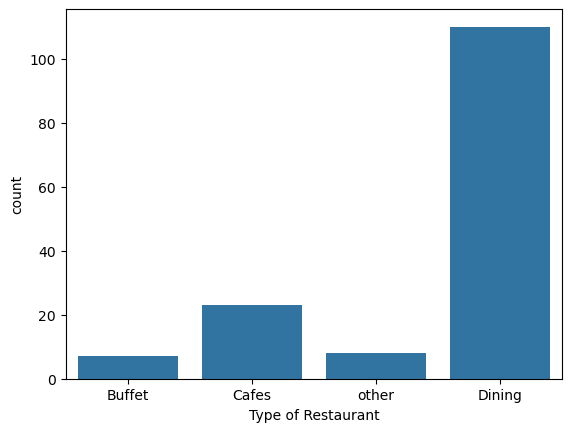

In [144]:
sns.countplot(data = df,x='listed_in(type)')
plt.xlabel('Type of Restaurant')
plt.show()

### Conclusion: Majority of the restaurants falls in the Dinning category

### Q2. How many votes has each type of restaurant received from customers

In [145]:
votes_res = df.groupby(by='listed_in(type)')['votes'].sum()
votes_res

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

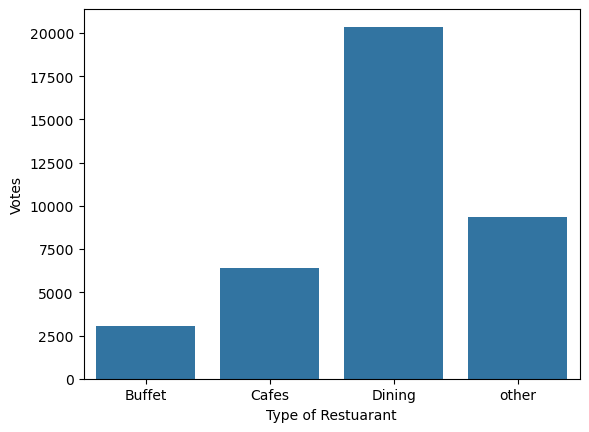

In [146]:
sns.barplot(votes_res)
plt.xlabel('Type of Restuarant')
plt.ylabel('Votes')
plt.show()

### Conclusion: Dinning restaurants has received maximum votes

### Q3. What are the ratings that the majority of the restaurants have received

In [147]:
rat_res = df['rate'].value_counts()
rat_res

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.2     7
3.1     7
2.9     7
3.5     6
3.0     2
4.6     2
2.8     2
4.4     2
4.3     1
2.6     1
Name: count, dtype: int64

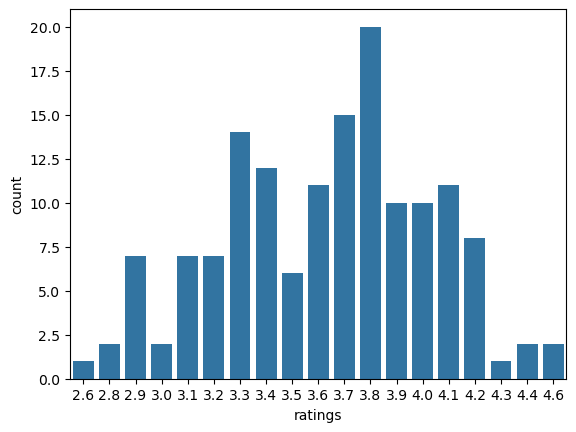

In [148]:
sns.barplot(rat_res)
plt.xlabel('ratings')
plt.show()

### Conclusion: Majority restaurants received ratings of 3.8

### Q4. Most of the couples order most of their food online. What is the average spending on each other?

In [149]:
coup_spend = df[df['online_order'] == 'Yes']['approx_cost(for two people)'].value_counts()
coup_spend

approx_cost(for two people)
600    9
500    9
800    8
400    7
300    5
150    4
750    3
450    3
200    3
700    2
650    2
550    1
850    1
100    1
Name: count, dtype: int64

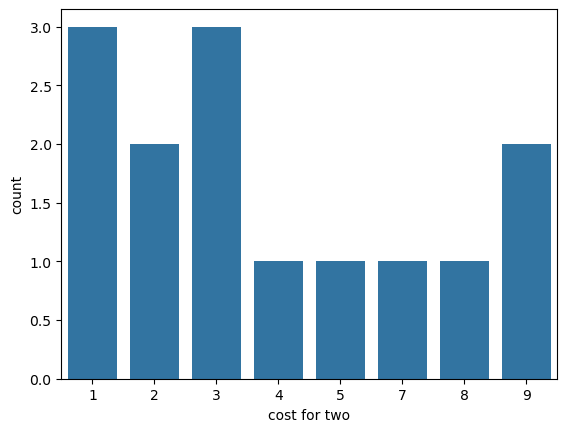

In [150]:
sns.countplot(x = coup_spend)
plt.xlabel('cost for two')
plt.show()

### Conclusion: Majority of couples prefer ordering from restaurants with approximate cost of 500 and 600

### Q5. Which mode has received the maximum salary?

In [151]:
df.groupby(by='online_order')['rate'].max()

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64

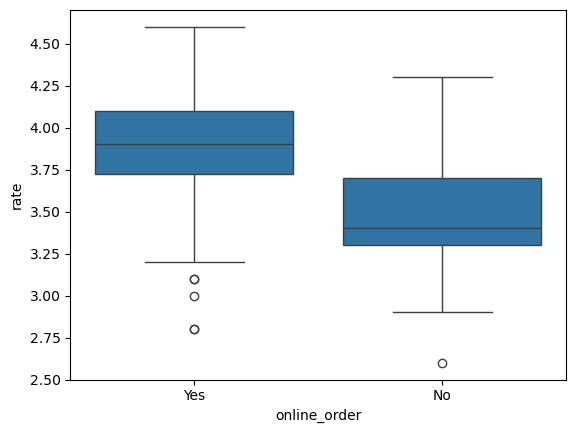

In [152]:
sns.boxplot(data = df, x='online_order',y='rate')
plt.show()

### Conclusion: Offline order received lower rating in comparison to online order

### Q6. Which type of restaurants received more offline orders?

In [153]:
off_type = df[df['online_order'] == 'No']['listed_in(type)'].value_counts()
off_type

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64

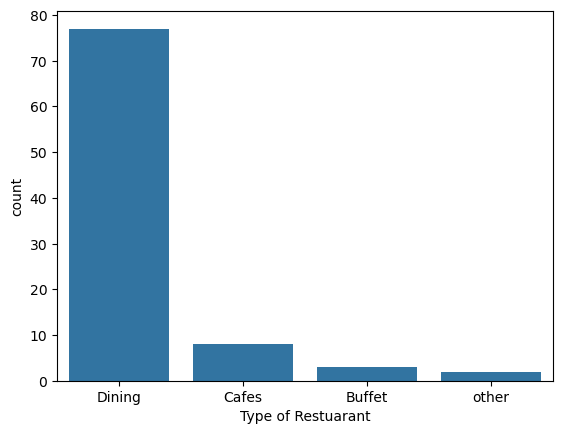

In [154]:
sns.barplot(off_type)
plt.xlabel('Type of Restuarant')
plt.show()

### Conclusion: Dining Restaurants by far receives more offline orders than cafes,buffet and other   